In [2]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('SMBH_Data_format_0228.csv',header=1,skiprows=lambda i: i % 2)
df

,ID,Galaxy,Morphology,Type,T-type,T-type_std,Arm Class,Bar,Disk,Core,...,Log_Avg_Rho_10kpc_approx,Log_Avg_Rho_10kpc_approx_std,Log_Avg_Rho_10kpc_exact_final,Log_Avg_Rho_10kpc_exact_final_std,Log_Avg_Rho_100pc_approx,Log_Avg_Rho_100pc_approx_std,Log_Avg_Rho_5kpc_approx,Log_Avg_Rho_5kpc_approx_std,Log_Avg_rho_5kpc_exact_all,Log_Avg_rho_5kpc_exact_all_std
0,1,A1836 BCG,E,ETG,-3.2,0.7,NaN,0.0,0.0,1.0,...,-1.360877,NaN,-1.361284,NaN,1.987071,NaN,-0.713748,NaN,-0.716179,NaN
1,2,IC 1459,E,ETG,-4.8,0.4,NaN,0.0,0.0,1.0,...,-1.390948,NaN,-1.391062,NaN,2.985206,NaN,-0.637989,NaN,-0.638676,NaN
2,3,IC 1481,E? (merger),ETG,8.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,IC 4296,E,ETG,-4.9,0.3,NaN,0.0,0.0,0.0,...,-1.476680,NaN,-1.476624,NaN,2.142677,NaN,-0.788658,NaN,-0.789930,NaN
4,5,Mrk 1216,S0,ETG,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,2.0,0.3,NaN,1.0,1.0,0.0,...,-2.829093,NaN,-2.829092,NaN,0.808899,NaN,-1.929342,NaN,-1.929224,NaN
141,142,NGC 6926,SBc,LTG,5.6,2.3,5.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,143,NGC 7582,SBab,LTG,2.1,0.5,NaN,1.0,1.0,0.0,...,-2.478355,NaN,-2.481833,NaN,2.312835,NaN,-1.577816,NaN,-1.577750,NaN
143,144,UGC 3789,SABa,LTG,1.6,0.6,NaN,1.0,1.0,0.0,...,-2.508741,NaN,-2.508212,NaN,2.058912,NaN,-1.626496,NaN,-1.626075,NaN


In [4]:
df.columns

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'T-type_std',
       'Arm Class', 'Bar', 'Disk', 'Core',
       ...
       'Log_Avg_Rho_10kpc_approx', 'Log_Avg_Rho_10kpc_approx_std',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_10kpc_exact_final_std',
       'Log_Avg_Rho_100pc_approx', 'Log_Avg_Rho_100pc_approx_std',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_Rho_5kpc_approx_std',
       'Log_Avg_rho_5kpc_exact_all', 'Log_Avg_rho_5kpc_exact_all_std'],
      dtype='object', length=154)

In [14]:
# remove stds
std_col=np.array([],dtype=int)
for i,col in enumerate(df.columns):
    if (col[-3:]=='std') & (col!='M_BH_std'):
        std_col=np.append(std_col,i)

cols=np.delete(np.arange(df.shape[1]),std_col)
df_nostd=df.iloc[:,cols]

# clean the ones that tells the answer directly
df_clean=df_nostd.drop(['M_BH/M*_sph', 'log_M_BH/M*_sph', 'M_BH/M*_disk', 'log_M_BH/M*_disk',
       'M_BH/M*_gal', 'log_M_BH/M*_gal'],axis='columns')

In [16]:
df_clean

,ID,Galaxy,Morphology,Type,T-type,Arm Class,Bar,Disk,Core,AGN,...,Avg_Rho_soi_exact_all,Avg_Rho_re_Exact_all,Rho_re_Exact_all,r_soi_2BH_approx,Rho_r_soi_2BH_approx,Log_Avg_Rho_10kpc_approx,Log_Avg_Rho_10kpc_exact_final,Log_Avg_Rho_100pc_approx,Log_Avg_Rho_5kpc_approx,Log_Avg_rho_5kpc_exact_all
0,1,A1836 BCG,E,ETG,-3.2,NaN,0.0,0.0,1.0,0.0,...,43.3455,0.019965,0.004228,611.2,3.89425,-1.360877,-1.361284,1.987071,-0.713748,-0.716179
1,2,IC 1459,E,ETG,-4.8,NaN,0.0,0.0,1.0,1.0,...,693.8220,0.040740,0.006004,113.6,287.55400,-1.390948,-1.391062,2.985206,-0.637989,-0.638676
2,3,IC 1481,E? (merger),ETG,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,IC 4296,E,ETG,-4.9,NaN,0.0,0.0,0.0,1.0,...,367.6120,0.030594,0.006163,229.6,21.28690,-1.476680,-1.476624,2.142677,-0.788658,-0.789930
4,5,Mrk 1216,S0,ETG,NaN,NaN,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,2.0,NaN,1.0,1.0,0.0,0.0,...,24.3697,0.402019,0.153181,88.4,5.43268,-2.829093,-2.829092,0.808899,-1.929342,-1.929224
141,142,NGC 6926,SBc,LTG,5.6,5.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,143,NGC 7582,SBab,LTG,2.1,NaN,1.0,1.0,0.0,1.0,...,2007.2100,8.773510,2.350510,26.8,703.78300,-2.478355,-2.481833,2.312835,-1.577816,-1.577750
143,144,UGC 3789,SABa,LTG,1.6,NaN,1.0,1.0,0.0,0.0,...,4285.7700,1.729780,0.419856,16.4,752.63400,-2.508741,-2.508212,2.058912,-1.626496,-1.626075


In [22]:
nanpercent=0.16
cols_to_delete = df_clean.columns[df_clean.isnull().sum()/len(df_clean) > nanpercent]
df_lessnan=df_clean.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
print(df_purge.columns)
print(len(df_purge.columns))
#HTML(df_purge.to_html())

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'Bar', 'Disk', 'Core',
       'AGN', 'Pseudobulge', 'M_BH', 'M_BH_std', 'M*_sph', 'M*_gal', 'B/T',
       'log_B/T', 'sigma0', 'log_sigma0', 'R_e_sph_maj', 'log_R_e_sph_maj',
       'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj', 'log_n_sph_maj',
       'n_sph_eq', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'Rho_e_Exact_new', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'Rsoi_pc_new', 'logRho_soi_approx_new',
       'Rho_soi_exact_new', 'log

In [23]:
nanpercent=0.145
cols_to_delete = df_clean.columns[df_clean.isnull().sum()/len(df_clean) > nanpercent]
df_lessnan=df_clean.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
print(df_purge.columns)
print(len(df_purge.columns))
#HTML(df_purge.to_html())

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'Bar', 'Disk', 'Core',
       'AGN', 'Pseudobulge', 'M_BH', 'M_BH_std', 'M*_sph', 'M*_gal', 'B/T',
       'log_B/T', 'sigma0', 'log_sigma0', 'R_e_sph_maj', 'log_R_e_sph_maj',
       'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj', 'log_n_sph_maj',
       'n_sph_eq', 'log_n_sph_eq'],
      dtype='object')
26


In [42]:
HTML(df_purge.to_html())

,ID,Galaxy,Morphology,Type,T-type,Bar,Disk,Core,AGN,Pseudobulge,M_BH,M_BH_std,M*_sph,M*_gal,B/T,log_B/T,sigma0,log_sigma0,R_e_sph_maj,log_R_e_sph_maj,R_e_sph_eq_kpc,log_R_e_sph_eq_kpc,n_sph_maj,log_n_sph_maj,n_sph_eq,log_n_sph_eq
0,1,A1836 BCG,E,ETG,-3.2,0.0,0.0,1.0,0.0,0,9.59,0.06,11.70,11.7000,1.00,0.00,309.03,2.49,17.596665,1.25,10.819125,1.03,4.10,0.61,3.47,0.54
1,2,IC 1459,E,ETG,-4.8,0.0,0.0,1.0,1.0,0,9.38,0.20,11.69,11.6900,1.00,0.00,306.10,2.49,8.460000,0.93,7.680000,0.89,6.60,0.82,7.00,0.85
3,4,IC 4296,E,ETG,-4.9,0.0,0.0,0.0,1.0,0,9.10,0.09,11.72,11.7400,0.95,-0.02,332.81,2.52,9.590000,0.98,9.120000,0.96,3.85,0.59,3.82,0.58
5,6,NGC 0307,SAB0,ETG,-1.9,1.0,1.0,0.0,0.0,0,8.34,0.13,10.43,10.7632,0.46,-0.33,310.98,2.49,0.756900,-0.12,0.840159,-0.08,3.33,0.52,3.76,0.58
6,7,NGC 0404,S0,ETG,-2.8,0.0,1.0,0.0,0.0,0,5.74,0.10,8.03,9.1900,0.07,-1.16,38.15,1.58,0.060000,-1.23,0.057572,-1.24,0.93,-0.03,0.90,-0.05
7,8,NGC 0524,SA0(rs),ETG,-1.2,0.0,1.0,1.0,0.0,0,9.00,0.10,10.88,11.3800,0.32,-0.50,253.46,2.40,1.160000,0.06,1.100000,0.04,2.29,0.36,2.16,0.33
9,10,NGC 0821,E,ETG,-4.8,0.0,0.0,0.0,0.0,0,7.59,0.17,10.84,10.9000,0.87,-0.06,200.20,2.30,4.050000,0.61,3.450000,0.54,5.30,0.72,5.20,0.72
10,11,NGC 1023,S0-bar,ETG,-2.6,1.0,1.0,0.0,0.0,0,7.62,0.05,10.33,10.8900,0.28,-0.56,204.48,2.31,0.490000,-0.31,0.390000,-0.41,2.10,0.32,2.00,0.30
11,12,NGC 1194,S0 (merger?),ETG,-0.6,0.0,1.0,0.0,1.0,0,7.82,0.04,10.78,11.0100,0.59,-0.23,147.91,2.17,0.900000,-0.05,0.910000,-0.04,3.76,0.58,3.91,0.59
12,13,NGC 1271,ES,ETG,-2.0,0.0,1.0,0.0,0.0,0,9.48,0.16,10.95,11.0569,0.78,-0.11,275.42,2.44,1.233050,0.09,1.164758,0.07,4.26,0.63,4.16,0.62


In [50]:
df_purge.columns

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'Bar', 'Disk', 'Core',
       'AGN', 'Pseudobulge', 'M_BH', 'M_BH_std', 'M*_sph', 'M*_gal', 'B/T',
       'log_B/T', 'sigma0', 'log_sigma0', 'R_e_sph_maj', 'log_R_e_sph_maj',
       'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj', 'log_n_sph_maj',
       'n_sph_eq', 'log_n_sph_eq'],
      dtype='object')

In [62]:
y = df_purge['M_BH'].to_numpy()
#w = 1/df_purge['M_BH_std']**2

# use numerical columns, and seperate y
df_handson = df_purge.iloc[:,4:].drop(['M_BH', 'M_BH_std'],axis='columns')
X = df_handson.to_numpy()

'''
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    select_k_features=5,
)
'''
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/",'pow'],
    unary_operators=["exp"],
    select_k_features=9
)


model.fit(X, y)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x6' 'x8' 'x9' 'x10' 'x11' 'x14' 'x15' 'x18' 'x19']
Started!

Cycles per second: 5.880e+04
Head worker occupation: 11.3%
Progress: 170 / 600 total iterations (28.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.010e+00  -1.000e-10  8.166134
3           3.056e-01  5.974e-01  (x6 - 2.456888)
5           3.056e-01  5.955e-08  ((x6 + -0.22771406) - 2.2291517)
6           2.497e-01  2.021e-01  (exp(1.0232035 ^ x6) * x11)
9           2.185e-01  4.457e-02  ((((x10 ^ 0.3030194) + x8) - -1.2889692) + 1.3189545)
11          2.139e-01  1.057e-02  (((((x10 + x14) ^ 0.3030194) + x8) - -1.2889692) + 1.3189545)
12          2.132e-01  3.181e-03  (exp(0.9799742 ^ ((-2.0006573 / (x8 ^ x9)) - x6)) * x11)
13          2.132e-01  2.701e-04  (((((x10 + (x14 + x14)) ^ 0.3030194) + x8) - -1.2889692) + 1.3189545)
14          2.052e-01  3.812e-02  (exp(0.9800247 ^ ((-2.0006573 / (x8 ^ (x9 + x15))) - x6)) * x11)
17          1.989

PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           8.166134   
	1         5.974214e-01                                    (x6 - 2.456888)   
	2         4.907602e-08                   ((x6 + -0.22771406) - 2.2291517)   
	3   >>>>  2.020667e-01                        (exp(1.0232035 ^ x6) * x11)   
	4         4.711169e-02                 (exp(1.0232035 ^ (x6 + x9)) * x11)   
	5         5.503953e-02  ((((x10 ^ 0.3032139) + x8) - -0.7169414) + 1.9...   
	6         4.935072e-03  (((((x10 + x14) ^ 0.30038583) + x8) - -0.73511...   
	7         1.398569e-02  (exp(0.98046577 ^ ((-2.3753572 / (x8 ^ x9)) - ...   
	8         1.165781e-02  (exp(0.9800247 ^ ((-2.0006573 / (x8 ^ (x9 + x1...   
	9         7.789330e-02  (((((x10 + ((x10 * x19) / x18)) ^ 0.29708818) ...   
	10        1.040740e-02  (((((x10 + (((x10 / 0.64730126) * x19) / x18))...   
	11        4.927534e-03  (((((x10 +

In [59]:
def x2name(feature_list,df_handson=df_handson):
    for ind in feature_list:
        i=int(ind[1:])
        print('x',i,':',df_handson.columns[i])

In [64]:
model.latex()

'x_{11} e^{1.02^{x_{6}}}'

In [63]:
feature_list=['x6','x8','x9','x10','x11','x14','x15','x18','x19']
x2name(feature_list,df_handson)

x 6 : M*_sph
x 8 : B/T
x 9 : log_B/T
x 10 : sigma0
x 11 : log_sigma0
x 14 : R_e_sph_eq_kpc
x 15 : log_R_e_sph_eq_kpc
x 18 : n_sph_eq
x 19 : log_n_sph_eq


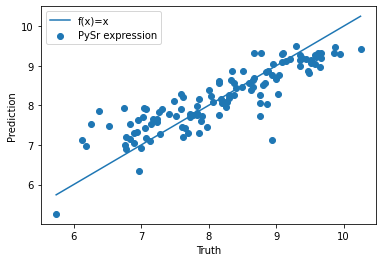

In [65]:
plt.scatter(y, model.predict(X),label='PySr expression')
plt.plot(np.linspace(y.min(),y.max()),np.linspace(y.min(),y.max()),label='f(x)=x')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [68]:
((model.predict(X)-y)**2).mean()

0.24972705387232672

In [38]:
model.latex()

'x_{2} + 2.76 x_{4}^{0.193}'

In [37]:
x2name(['x0','x2', 'x3', 'x4', 'x5', 'x9'])

x 0 : M*_sph
x 2 : B/T
x 3 : log_B/T
x 4 : sigma0
x 5 : log_sigma0
x 9 : log_R_e_sph_eq_kpc


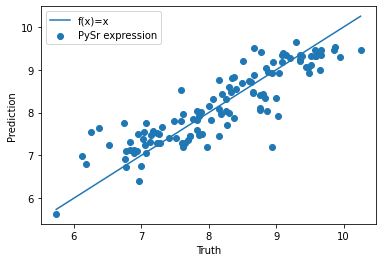

In [39]:
plt.scatter(y, model.predict(X),label='PySr expression')
plt.plot(np.linspace(y.min(),y.max()),np.linspace(y.min(),y.max()),label='f(x)=x')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [55]:
model.latex()

'e^{e^{0.254 x_{11}}} + e^{e^{x_{9}}}'

In [60]:
feature_list=['x6','x8','x9','x10','x11','x19']
x2name(feature_list,df_handson)

x 6 : M*_sph
x 8 : B/T
x 9 : log_B/T
x 10 : sigma0
x 11 : log_sigma0
x 19 : log_n_sph_eq


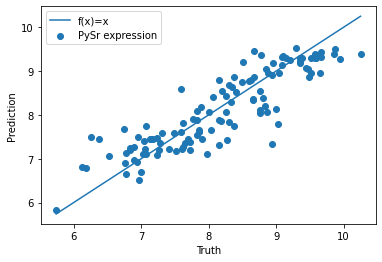

In [53]:
plt.scatter(y, model.predict(X),label='PySr expression')
plt.plot(np.linspace(y.min(),y.max()),np.linspace(y.min(),y.max()),label='f(x)=x')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.legend()
plt.show()